In [1]:
import pyspark # only run after findspark.init()
from pyspark import SparkContext, SparkConf
conf = SparkConf()
sc = SparkContext(conf=conf)

from pyspark.sql import SQLContext
sqlContext=SQLContext(sc)
from pyspark.sql.types import IntegerType
import pandas as pd
from pyspark.sql.functions import udf
import pyspark.sql.functions as F
from pyspark.sql.window import Window

In [7]:
data = sc.textFile('docker.txt')
abb = data.flatMap(lambda x:x.split(' '))
abb.map(lambda x:(x,1)).reduceByKey(lambda x,y:x+y).collect()

[('RUN', 2),
 ('update', 1),
 ('/app', 2),
 ('requirements.txt', 1),
 ('/app/requirements.txt', 2),
 ('pip', 1),
 ('install', 1),
 ('.', 1),
 ('PORT', 1),
 ('8080', 1),
 ('CMD', 1),
 ('["gunicorn",', 1),
 ('FROM', 1),
 ('python:3.6-jessie', 1),
 ('apt', 1),
 ('WORKDIR', 1),
 ('ADD', 2),
 ('-r', 1),
 ('ENV', 1),
 ('"app:app",', 1),
 ('"--config=config.py"]', 1)]

In [ ]:
sc.setLogLevel("WARN")
#setup the same way you have it
log_txt=sc.textFile("/path/to/data/sample_data.txt")
header = log_txt.first()

#filter out the header, make sure the rest looks correct
log_txt = log_txt.filter(lambda line: line != header)
log_txt.take(10)
  [u'0\\tdog\\t20160906182001\\tgoogle.com', u'1\\tcat\\t20151231120504\\tamazon.com']

temp_var = log_txt.map(lambda k: k.split("\\t"))

#here's where the changes take place
#this creates a dataframe using whatever pyspark feels like using (I think string is the default). the header.split is providing the names of the columns
log_df=temp_var.toDF(header.split("\\t"))
log_df.show()
+------+------+--------------+----------+
|field1|field2|        field3|    field4|
+------+------+--------------+----------+
|     0|   dog|20160906182001|google.com|
|     1|   cat|20151231120504|amazon.com|
+------+------+--------------+----------+

In [2]:
scc = SparkContext.getOrCreate()

In [3]:
import pyspark # only run after findspark.init()
from pyspark import SparkContext, SparkConf
conf = SparkConf()
sc = SparkContext(conf=conf)

from pyspark.sql import SQLContext
sqlContext=SQLContext(sc)
from pyspark.sql.types import IntegerType
import pandas as pd
from pyspark.sql.functions import udf
import pyspark.sql.functions as F
from pyspark.sql.window import Window
data = [('Foo',10,'US',3),\
                ('Foo',39,'UK',1),\
                ('Bar',57,'IN',2),\
                ('Bar',72,'CA',2),\
                ('Baz',22,'US',6),\
                ('Baz',23,'UK',6)]
df = sqlContext.createDataFrame(data,['name','age','country','id'])

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-1-114fd3f6d0d6>:4 

In [11]:

df_pd = pd.DataFrame(
    data={'integers': [1, 2, 3],
     'floats': [22, 33, 45],
     'integer_arrays': [[1, 2], [3, 4, 5], [6, 7, 8, 9]]}
)
df = sqlContext.createDataFrame(df_pd)
df.show()



+--------+------+--------------+
|integers|floats|integer_arrays|
+--------+------+--------------+
|       1|    22|        [1, 2]|
|       2|    33|     [3, 4, 5]|
|       3|    45|  [6, 7, 8, 9]|
+--------+------+--------------+



In [14]:
def add_two(str1,str2):
    return str1+str2
add_twp_udf = udf(add_two,IntegerType())    

df.withColumn('add_int_flot',add_twp_udf(df.integers,df.floats)).show()

+--------+------+--------------+------------+
|integers|floats|integer_arrays|add_int_flot|
+--------+------+--------------+------------+
|       1|    22|        [1, 2]|          23|
|       2|    33|     [3, 4, 5]|          35|
|       3|    45|  [6, 7, 8, 9]|          48|
+--------+------+--------------+------------+



In [8]:

df_pd = pd.DataFrame(
    data={'integers': [1, 2, 3],
     'floats': [-1.0, 0.5, 2.7],
     'integer_arrays': [[1, 2], [3, 4, 5], [6, 7, 8, 9]]}
)
df = sqlContext.createDataFrame(df_pd)
def square(x):
    return x**2

square_udf_int = udf(lambda z: square(z), IntegerType())
(df.select('integers',
              'floats',
              square_udf_int('integers').alias('int_squared'),
              square_udf_int('floats').alias('float_squared'))
    .show())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\vprasad\\AppData\\Local\\Temp\\spark-f9eb3334-d34e-4f67-b9be-6294c8388290\\pyspark-fa21473d-53c3-4271-b721-7909791c2b95\\tmp6a79uuns'

In [2]:
data = [('Foo',10,'US',3),\
                ('Foo',39,'UK',1),\
                ('Bar',57,'IN',2),\
                ('Bar',72,'CA',2),\
                ('Baz',22,'US',6),\
                ('Baz',23,'UK',6)]
df = sqlContext.createDataFrame(data,['name','age','country','id'])

In [3]:
from pyspark.sql.types import StringType
sqlContext.registerFunction(
                "RankToFlag", lambda x: "Y" if x > 1 else "N", StringType())

<function __main__.<lambda>(x)>

In [12]:
keyCols = 'country'
orderStr = 'id'
queryStr = 'select *, RankToFlag(ROW_NUMBER() over (partition by ' \
                       + keyCols + ' order by ' + orderStr + ' )) as rank ' \
                                                             ' from df order by ' + orderStr
df.registerTempTable('df')
querys= 'select * from df where '+keyCols+'=uk'

In [13]:
ddf = exec(querys)
ddf.show()

SyntaxError: invalid syntax (<string>, line 1)

In [28]:
df.withColumnRenamed('name', 'firstname').show()

+---------+---+-------+---+
|firstname|age|country| id|
+---------+---+-------+---+
|      Foo| 10|     US|  3|
|      Foo| 39|     UK|  1|
|      Bar| 57|     IN|  2|
|      Bar| 72|     CA|  2|
|      Baz| 22|     US|  6|
|      Baz| 23|     UK|  6|
+---------+---+-------+---+



In [26]:
df.filter(df.name == 'Foo').drop('age').show()

+----+-------+---+
|name|country| id|
+----+-------+---+
| Foo|     US|  3|
| Foo|     UK|  1|
+----+-------+---+



In [14]:
df2 = df.dropDuplicates(subset=['name'])

In [15]:
df2.show(111)

+----+---+-------+---+
|name|age|country| id|
+----+---+-------+---+
| Bar| 57|     IN|  2|
| Foo| 10|     US|  3|
| Baz| 22|     US|  6|
+----+---+-------+---+



In [25]:
df.drop('id').join(df2.drop('id'),df.name==df2.name,'inner').show()

+----+---+-------+----+---+-------+
|name|age|country|name|age|country|
+----+---+-------+----+---+-------+
| Bar| 57|     IN| Bar| 57|     IN|
| Bar| 72|     CA| Bar| 57|     IN|
| Foo| 10|     US| Foo| 10|     US|
| Foo| 39|     UK| Foo| 10|     US|
| Baz| 22|     US| Baz| 22|     US|
| Baz| 23|     UK| Baz| 22|     US|
+----+---+-------+----+---+-------+



In [43]:
df.printSchema()dtypes

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)
 |-- country: string (nullable = true)
 |-- id: long (nullable = true)



In [29]:
df.select(*(df.columns)).show()

+----+---+-------+---+
|name|age|country| id|
+----+---+-------+---+
| Foo| 10|     US|  3|
| Foo| 39|     UK|  1|
| Bar| 57|     IN|  2|
| Bar| 72|     CA|  2|
| Baz| 22|     US|  6|
| Baz| 23|     UK|  6|
+----+---+-------+---+



In [52]:
df.where('country' + "='IN'").show()

+----+---+-------+---+
|name|age|country| id|
+----+---+-------+---+
| Bar| 57|     IN|  2|
+----+---+-------+---+



In [ ]:
df.withColumnRenamed('name', 'firstname').show()
df.filter(df.name == 'Foo').drop('age').drop('country').show()
df2 = df.dropDuplicates(subset=['name'])
df.join(df2,df.name==df2.name,'inner').show()
df.where('country '+ "='IN'").show()
df.select('name','age').show()

In [54]:
df.sort('name','id').show()
#dff = sqlContext.sql(query).fillna('')

+----+---+-------+---+
|name|age|country| id|
+----+---+-------+---+
| Bar| 72|     CA|  2|
| Bar| 57|     IN|  2|
| Baz| 23|     UK|  6|
| Baz| 22|     US|  6|
| Foo| 39|     UK|  1|
| Foo| 10|     US|  3|
+----+---+-------+---+



In [56]:
from pyspark.sql.functions import udf, lit, monotonically_increasing_id
df.withColumn("ROW_NUM", monotonically_increasing_id()).show()

+----+---+-------+---+-----------+
|name|age|country| id|    ROW_NUM|
+----+---+-------+---+-----------+
| Foo| 10|     US|  3| 8589934592|
| Foo| 39|     UK|  1|17179869184|
| Bar| 57|     IN|  2|25769803776|
| Bar| 72|     CA|  2|42949672960|
| Baz| 22|     US|  6|51539607552|
| Baz| 23|     UK|  6|60129542144|
+----+---+-------+---+-----------+



In [ ]:
#collease vs repartition
Node 1 = 1,2,3
Node 2 = 4,5,6
Node 3 = 7,8,9
Node 4 = 10,11,12,17

Then coalesce down to 2 partitions:

Node 1 = 1,2,3 + (10,11,12)
Node 3 = 7,8,9 + (4,5,6)
coalesce uses existing partitions to minimize the amount of data 
that's shuffled.  repartition creates new partitions and does a full shuffle
coalesce results in partitions with different amounts of data 
(sometimes partitions that have much different sizes) and repartition results in roughly equal sized partitions.

coalesce may run faster than repartition, but unequal sized partitions are generally slower to work with 
than equal sized partitions. You ll usually need to repartition datasets after filtering a large data set
. I ve found repartition to be faster overall because Spark is built to work with equal sized partitions.

repartition - its recommended to use repartition while increasing no of partitions, 
because it involve shuffling of all the data.

coalesce- it’s is recommended to use coalesce while reducing no of partitions

When partitioning by a column, Spark will create a minimum of 200 partitions by default. This example will have two partitions with data and 198 empty partitions.

In [ ]:
#persistance
With cache(), you use only the default storage level MEMORY_ONLY. With persist(), you can specify which storage level you want

MEMORY_ONLY--deserialized,recompute them next time whenever needed
MEMORY_ONLY_SER--serialized,space efficient as compared to deserialized objects,
MEMORY_AND_DISK--stores the excess partition on the disk,
MEMORY_AND_DISK_SER
DISK_ONLY


In [ ]:
--executor mem=50G
--num-exe =10
--exe-core =4
5 tasks per executor --  . So it’s good to keep the number of cores per executor below that number

In [ ]:
#word count prob
counts = lines.flatMap(lambda x: x.split(' ')) \
                  .map(lambda x: (x, 1)) \
                  .reduceByKey(add)
    output = counts.collect()
    for (word, count) in output:
        print("%s: %i" % (word, count))

In [63]:
a=['a','b']
b=['c','d','e']
c=a+b

In [64]:
c

['a', 'b', 'c', 'd', 'e']

In [65]:
a=[1,2,3,4,1]
z=a[0]
for i in a:
    if i>z:
        z=i
print(z)        

4


In [27]:
# df.withColumn(
#             "no_basket",
#             F.when(
#                 F.col("id") != 0,
#                 0
#             ).otherwise(
#                 1
#             )).show()
df.withColumn('age category',F.when((F.col('age')>10)&(F.col('age')<70),'Adult').otherwise('NA')).fillna({"age category":0}).show()

+----+---+-------+---+------------+
|name|age|country| id|age category|
+----+---+-------+---+------------+
| Foo| 10|     US|  3|          NA|
| Foo| 39|     UK|  1|       Adult|
| Bar| 57|     IN|  2|       Adult|
| Bar| 72|     CA|  2|          NA|
| Baz| 22|     US|  6|       Adult|
| Baz| 23|     UK|  6|       Adult|
+----+---+-------+---+------------+



In [74]:
df.filter(
    F.col('age')>50
).select('name','country').show()

+----+-------+
|name|country|
+----+-------+
| Bar|     IN|
| Bar|     CA|
+----+-------+



In [28]:
df.groupBy(df.name).agg(F.sum('age')).show()
#df.withColumn("min age",F.min('age').over(Window.partitionBy('name'))).show()
df.withColumn('sum age',F.sum('age').over(Window.partitionBy('name'))).show()

+----+--------+
|name|sum(age)|
+----+--------+
| Bar|     129|
| Foo|      49|
| Baz|      45|
+----+--------+

+----+---+-------+---+-------+
|name|age|country| id|sum age|
+----+---+-------+---+-------+
| Bar| 57|     IN|  2|    129|
| Bar| 72|     CA|  2|    129|
| Foo| 10|     US|  3|     49|
| Foo| 39|     UK|  1|     49|
| Baz| 22|     US|  6|     45|
| Baz| 23|     UK|  6|     45|
+----+---+-------+---+-------+



In [ ]:
# Broadcast Variables and accumulator
# tunining
# executor
# mapside join
# spark lifecycle

#data sources available in Spark SQL
#the null values in spark?
#Catalyst Framework?
#What is Executor Memory in a Spark application?


In [ ]:
#pythonprograms
#SQL query
#shell scripts revision

In [ ]:
If we take 
No of node=10
parallel task per executor=4
4core/executor
no of core=16
total executor=4/node 
Toal no. of exe= 40
64GB/node
64/4=16

In [ ]:
#parquet

All built-in file sources (including Text/CSV/JSON/ORC/Parquet) 
are able to discover and infer partitioning information automatically

By passing path/to/table to either SparkSession.read.parquet or
SparkSession.read.load, Spark SQL will automatically extract the partitioning information

For example, when path/to/table/gender=male is the path of the data 
and users set basePath to path/to/table/, gender will be a partitioning column

#issue faced
before- hive on parquet(R,W)
after- spark on paruet(R,W)
scene- one column was int in hive while it was bigint in spark. It was throwing error while reading. 

When reading from and writing to Hive metastore Parquet tables, 
Spark SQL will try to use its own Parquet support instead of Hive SerDe for better performance.(can be changed)

#reconciliation rules are:

Fields that have the same name in both schema must have the same data type regardless of nullability.
The reconciled schema contains exactly those fields defined in Hive metastore schema.

spark.catalog.refreshTable("my_table")


In [ ]:
#data sources
Avro
Hive table
Parquet
ORC
JSON
DB to other sources

In [ ]:
#Performance Tuinng
1. cache()--spark.catalog.cacheTable("tableName") or dataFrame.cache()
2. compressed--spark.sql.inMemoryColumnarStorage.compressed	
3. spark.sql.inMemoryColumnarStorage.batchSize	10000	improve memory utuilization
4. Broadcasting  hint join. #Structured queries can be optimized using Hint Framework
Spark SQL supports COALESCE and REPARTITION and BROADCAST hints

from pyspark.sql.functions import broadcast
broadcast(spark.table("src")).join(spark.table("records"), "key").show()

SELECT /*+ broadcast(a_b) */ *
FROM 
    (SELECT /*+ broadcast(a) */ * FROM a JOIN b ON ...) AS a_b 
    JOIN c ON ...

In [ ]:
#Broadcast variable
Fact and dimention join#reduce the memory I/O and to reduce the communication cost

broadcast variables are:

Immutable
Distributed to the cluster
Fit in memo

val broadcastVar = sc.broadcast(Array(1, 2, 3))
broadcastVar.value
#can be used to perform lookup
reduce the cost of communication+v is not shipped to the nodes more than once. 

Actions in Spark can be executed through different stages. These stages are separated by distributed “shuffle” operations.
Within each stage, Spark automatically broadcasts common data needed in a cached, serialized form which will be de-serialized
by each node before the running of each task.  For this reason, if you 
create broadcast variables explicitly, it should only be done when tasks across multiple stages are in need of the same data.

In [8]:
timeFmt = "yyyy-MM-dd'T'HH:mm:ss.SSS"
timeDiff = (F.unix_timestamp('EndDateTime', format=timeFmt)
            - F.unix_timestamp('StartDateTime', format=timeFmt))
df = df.withColumn("Duration", timeDiff)

Column<b'(unix_timestamp(2019-09-09, yyyy-MM-dd) - 2)'>

In [14]:
check_dates = df.groupby(
                'country'
            ).agg(
                F.countDistinct(F.col('id')).alias('id'), 
                F.countDistinct(F.col('age')).alias('age')
            ).orderBy(
                'country'
            ).show()

+-------+---+---+
|country| id|age|
+-------+---+---+
|     CA|  1|  1|
|     IN|  1|  1|
|     UK|  2|  2|
|     US|  2|  2|
+-------+---+---+



In [ ]:
#mem_only
df=df.filter()
default partition=


In [ ]:
############################################################################3

############################################################################3

In [1]:
import pyspark # only run after findspark.init()
from pyspark import SparkContext, SparkConf
conf = SparkConf()
sc = SparkContext(conf=conf)

from pyspark.sql import SQLContext
sqlContext=SQLContext(sc)
from pyspark.sql.types import IntegerType
import pandas as pd
from pyspark.sql.functions import udf
import pyspark.sql.functions as F
from pyspark.sql.window import Window


In [16]:
data = [('Foo',10,'US',3),\
                ('FooBar',39,'UK',1),\
                ('BarF',5,'IN',2),\
                ('BarF',57,'IN',2),\
                ('BaF',51,'IN',2),\
                ('Veronica',72,'CA',2),\
                ('Bazzigar',22,'US',6),\
                ('Southern',23,'UK',6)]
df = sqlContext.createDataFrame(data,['name','age','country','id'])

In [17]:
df.show()

+--------+---+-------+---+
|    name|age|country| id|
+--------+---+-------+---+
|     Foo| 10|     US|  3|
|  FooBar| 39|     UK|  1|
|    BarF|  5|     IN|  2|
|    BarF| 57|     IN|  2|
|     BaF| 51|     IN|  2|
|Veronica| 72|     CA|  2|
|Bazzigar| 22|     US|  6|
|Southern| 23|     UK|  6|
+--------+---+-------+---+



In [29]:
#q1->grp country,sum age,avg,count
df.groupBy('country').sum('age','id').show()
#df.groupBy('country').max('age').show()
#df.groupBy('name').count().show()

+-------+--------+-------+
|country|sum(age)|sum(id)|
+-------+--------+-------+
|     CA|      72|      2|
|     US|      32|      9|
|     IN|      57|      2|
|     UK|      62|      7|
+-------+--------+-------+

+-------+--------+
|country|max(age)|
+-------+--------+
|     CA|      72|
|     US|      22|
|     IN|      57|
|     UK|      39|
+-------+--------+

+----+-----+
|name|count|
+----+-----+
| Bar|    2|
| Foo|    2|
| Baz|    2|
+----+-----+



In [71]:
df.groupBy('country')\
    .agg(F.count('id').alias('count of id'),
        F.sum('age').alias('sum of age')
       )\
    .filter('`sum of age`>40')\
    .orderBy('sum of age',ascending=False) \
    .withColumnRenamed('sum of age','Aggregated age') \
    .withColumn('Age Classified',F.when(F.col('Aggregated age')>60,'Senior'). otherwise('Adult')) \
    .show()

+-------+-----------+--------------+--------------+
|country|count of id|Aggregated age|Age Classified|
+-------+-----------+--------------+--------------+
|     CA|          1|            72|        Senior|
|     UK|          2|            62|        Senior|
|     IN|          1|            57|         Adult|
+-------+-----------+--------------+--------------+



In [18]:
from pyspark.sql.types import StringType
sqlContext.registerFunction("FindMax",lambda x:"Y" if x>1 else "N",StringType())
df.registerTempTable('dff')
query = "select *, FindMax(row_number() over(partition by country order by age)) as general from dff"
finaldf = sqlContext.sql(query)
finaldf.show()

+--------+---+-------+---+-------+
|    name|age|country| id|general|
+--------+---+-------+---+-------+
|Veronica| 72|     CA|  2|      N|
|     Foo| 10|     US|  3|      N|
|Bazzigar| 22|     US|  6|      Y|
|    BarF|  5|     IN|  2|      N|
|     BaF| 51|     IN|  2|      Y|
|    BarF| 57|     IN|  2|      Y|
|Southern| 23|     UK|  6|      N|
|  FooBar| 39|     UK|  1|      Y|
+--------+---+-------+---+-------+



In [8]:
#df.registerTempTable('dff')
query = "select *, case when (row_number() over(partition by country order by age))>1 then 'N' else 'Y' end as general from dff"
finaldf = sqlContext.sql(query)
finaldf.show()

+----+---+-------+---+-------+
|name|age|country| id|general|
+----+---+-------+---+-------+
| Bar| 72|     CA|  2|      Y|
| Foo| 10|     US|  3|      Y|
| Baz| 22|     US|  6|      N|
| Bar| 57|     IN|  2|      Y|
| Baz| 23|     UK|  6|      Y|
| Foo| 39|     UK|  1|      N|
+----+---+-------+---+-------+



In [20]:
def FindMax(val):
    if val>1:
        return "N"
    else:
        return "Y"
fun = udf(FindMax,StringType())
query = df.select('id',fun('id').alias('Duplicate'))
query.show()

+---+---------+
| id|Duplicate|
+---+---------+
|  3|        N|
|  1|        Y|
|  2|        N|
|  2|        N|
|  2|        N|
|  2|        N|
|  6|        N|
|  6|        N|
+---+---------+



In [ ]:
############################DAILY challange ########################################

In [15]:
#data type conversion
data = [('Foo',10.4,'US',3),\
                ('FooBar',39.3,'UK',1),\
                ('BarF',5.3,'IN',2),\
                ('BarF',57.3,'IN',2),\
                ('BaF',51.0,'IN',2),\
                ('Veronica',72.3,'CA',2),\
                ('Bazzigar',22.2,'US',6),\
                ('Southern',23.2,'UK',6)]
df = sqlContext.createDataFrame(data,['name','age','country','id'])

In [22]:
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType
df1 = df.withColumn("id1",col("id").cast(IntegerType()))

In [16]:
#df.dtypes-->string,bigint,double

[('name', 'string'),
 ('age', 'double'),
 ('country', 'string'),
 ('id', 'bigint')]

In [23]:
df1 = df.withColumn("age1",col("age").cast(FloatType()))

In [24]:
df1.dtypes

[('name', 'string'),
 ('age', 'double'),
 ('country', 'string'),
 ('id', 'bigint'),
 ('age1', 'float')]

In [ ]:
######### Spark Context, SparkSQL, Spark Session
1. sqlcontext operations--> createDataFrame,sql,setConf("hivedynamicpartitin","true"),
registerDataFrameAsTable,registerFunction,dropTempTable,getConf("spark.sql.shuffle.partitions")
cacheTable,clearCache,createExternalTable,uncacheTable,read.parquet("...")--> retrn type df

3. sc -->sc.parallelize,textfile,broadcast,accumulator
2.spark --> read.parquet,sql,read.json,read.load,read.text,createDataFrame,

In [20]:
from pyspark.sql import SparkSession
spark = SparkSession.builder             .master("local")             .appName("Word Count")             .config("spark.some.config.option", "some-value")             .getOrCreate()

In [21]:
spark

In [28]:
spark.conf.get("spark.sql.crossJoin.enabled")

'false'

In [31]:
from pyspark.sql import SQLContext
sqlContext=SQLContext(spark)

In [32]:
from pyspark.sql.types import IntegerType
import pandas as pd
from pyspark.sql.functions import udf
import pyspark.sql.functions as F
from pyspark.sql.window import Window
data = [('Foo',10,'US',3),\
                ('Foo',39,'UK',1),\
                ('Bar',57,'IN',2),\
                ('Bar',72,'CA',2),\
                ('Baz',22,'US',6),\
                ('Baz',23,'UK',6)]
df = sqlContext.createDataFrame(data,['name','age','country','id'])

AnalysisException: 'java.lang.RuntimeException: java.lang.RuntimeException: Unable to instantiate org.apache.hadoop.hive.ql.metadata.SessionHiveMetaStoreClient;'

In [33]:
spark.sparkContext

<SparkContext master=local appName=Word Count>

In [34]:
session2 = spark.newSession()

<SparkContext master=local appName=Word Count>

In [36]:
spark

In [37]:
session2

In [3]:
import pyspark # only run after findspark.init()
from pyspark import SparkContext, SparkConf
conf = SparkConf()
sc = SparkContext(conf=conf)


ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-1-8d92681329a0>:4 

In [6]:
abb = sc.textFile("D:\\Data\\data\\split\\*.csv")#the read process is still happening at driver level


In [8]:
abb.take(10)

['InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country',
 '536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom',
 '536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom',
 '536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom',
 '536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom',
 'InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country',
 '536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom',
 '536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom',
 '536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom',
 '536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom']

In [5]:
from PIL import Image
try:  
    img  = Image.open('C:\\Users\\vprasad\\Images\\executor.png')  
except IOError: 
    pass


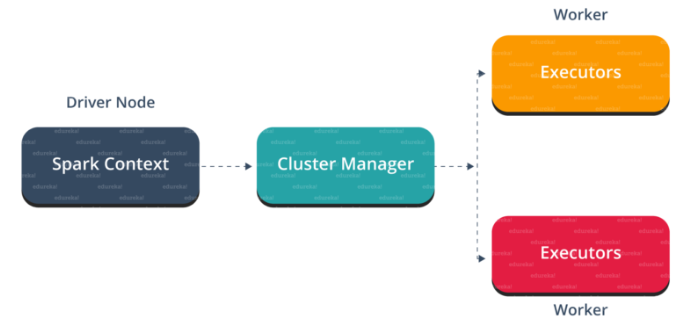

In [6]:
img

In [ ]:
df = sqlContext.createDataFrame([
    ("a", None, None),
    ("a", "code1", None),
    ("a", "code2", "name2"),
], ["id", "code", "name"])

df.show()

+---+-----+-----+
| id| code| name|
+---+-----+-----+
|  a| null| null|
|  a|code1| null|
|  a|code2|name2|
+---+-----+-----+
Note in the above you have to create a HiveContext. See https://stackoverflow.com/a/35529093/690430 for dealing with different Spark versions.

(df
  .groupby("id")
  .agg(F.collect_set("code"),
       F.collect_list("name"))
  .show())


In [34]:
###
weeks= [201910,201911,201912,201913,201917,201919,201920]
weeks.sort()
differences = [j - i for i, j in zip(weeks[:-1], weeks[1:])]
numperiods = 1
for k in differences:
    if k > 1:
        numperiods += 1
print(weeks)

[201910, 201911, 201912, 201913, 201917, 201919, 201920]


In [32]:
[j for i, j in zip(weeks[:-1], weeks[1:])]

[201911, 201912, 201913, 201917, 201919, 201920]

In [36]:
differences

[1, 1, 1, 4, 2, 1]

In [35]:
weeks.sort()
differences = [j - i for i, j in zip(weeks[:-1], weeks[1:])]
max_weeks = 1
tempweeks = 1
for k in differences:
    if k == 1:
        tempweeks += 1
    elif k > 1:
        tempweeks = 1
    if tempweeks > max_weeks:
        max_weeks = tempweeks
print(max_weeks) 

4


In [4]:
#Exercise 1
data = [('Foo',10,'US',3),\
                ('Foo',39,'UK',1),\
                ('Foo',19,'UK',1),\
                ('Bar',57,'IN',2),\
                ('Bar',72,'CA',2),\
                ('Baz',92,'US',6),\
                ('Baz',22,'US',6),\
                ('Baz',23,'UK',6)]
df = sqlContext.createDataFrame(data,['name','age','country','id'])

In [36]:
df.show()

+----+---+-------+---+
|name|age|country| id|
+----+---+-------+---+
| Foo| 10|     US|  3|
| Foo| 39|     UK|  1|
| Bar| 57|     IN|  2|
| Bar| 72|     CA|  2|
| Baz| 22|     US|  6|
| Baz| 23|     UK|  6|
+----+---+-------+---+



In [5]:
df.groupBy(F.col('name')).agg({'age':'sum'}).show()

+----+--------+
|name|sum(age)|
+----+--------+
| Bar|     129|
| Foo|      49|
| Baz|      45|
+----+--------+



In [ ]:
df.groupBy(F.col('name')).agg({'age':'sum'}).show()

In [23]:
ab = df.groupBy(F.col('name')).agg(F.sum('age').alias('tot_age'),F.countDistinct('age').alias('tot_count'))
cd = ab.withColumn('avgg',ab.tot_age/ab.tot_count)
cd.show()

+----+-------+---------+----+
|name|tot_age|tot_count|avgg|
+----+-------+---------+----+
| Bar|    129|        2|64.5|
| Foo|     49|        2|24.5|
| Baz|     45|        2|22.5|
+----+-------+---------+----+



In [26]:
#Exercise 2
dic = {22.5:'plat',24.5:'diamond',64.5:'gold'}
from pyspark.sql.types import StringType
def addingsh(strin):
    return dic[strin]

jj = F.udf(addingsh,StringType())

cd.withColumn('prime',jj(F.col('avgg'))).show()

+----+-------+---------+----+-------+
|name|tot_age|tot_count|avgg|  prime|
+----+-------+---------+----+-------+
| Bar|    129|        2|64.5|   gold|
| Foo|     49|        2|24.5|diamond|
| Baz|     45|        2|22.5|   plat|
+----+-------+---------+----+-------+



In [35]:
cd.withColumn('prime', F.when(F.col('avgg')==22.5,"plat").otherwise(F.when(F.col('avgg')==24.5,"diamond").otherwise(F.when(F.col('avgg')==64.5,"gold")))).show()

+----+-------+---------+----+-------+
|name|tot_age|tot_count|avgg|  prime|
+----+-------+---------+----+-------+
| Bar|    129|        2|64.5|   gold|
| Foo|     49|        2|24.5|diamond|
| Baz|     45|        2|22.5|   plat|
+----+-------+---------+----+-------+



In [5]:
df.show()

+----+---+-------+---+
|name|age|country| id|
+----+---+-------+---+
| Foo| 10|     US|  3|
| Foo| 39|     UK|  1|
| Foo| 19|     UK|  1|
| Bar| 57|     IN|  2|
| Bar| 72|     CA|  2|
| Baz| 92|     US|  6|
| Baz| 22|     US|  6|
| Baz| 23|     UK|  6|
+----+---+-------+---+



In [11]:
import pyspark.sql.types as T
import pyspark.sql.functions as F
import pyspark.sql.window as W
_window = W.Window.partitionBy('name').orderBy('age')
adf = df.withColumn('ntile',F.ntile(2).over(_window))

In [14]:
adf.groupBy('name','ntile').agg(F.count('age'),F.min('age'),F.max('age')).show()

+----+-----+----------+--------+--------+
|name|ntile|count(age)|min(age)|max(age)|
+----+-----+----------+--------+--------+
| Bar|    1|         1|      57|      57|
| Bar|    2|         1|      72|      72|
| Foo|    1|         2|      10|      19|
| Foo|    2|         1|      39|      39|
| Baz|    1|         2|      22|      23|
| Baz|    2|         1|      92|      92|
+----+-----+----------+--------+--------+

